In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
hr=pd.read_csv("HR_comma_sep.csv",sep=",")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [3]:
hr = pd.get_dummies(hr,drop_first=True,dtype='int')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [4]:
X=hr.drop("left",axis=1)
y=hr['left']

In [5]:
rf = RandomForestClassifier(random_state=23)
params = {'max_features':[3,4,5,6,7,8]}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [6]:
gcv_rf = GridSearchCV(rf,param_grid=params,cv=kfold,scoring = 'neg_log_loss',verbose=1)
gcv_rf.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_features': [3, 4, 5, 6, 7, 8]},
             scoring='neg_log_loss', verbose=1)

In [7]:
print("best parameter :",gcv_rf.best_params_)
print("best score :",gcv_rf.best_score_)

best parameter : {'max_features': 5}
best score : -0.08728637173510187


In [8]:
bm_rf = gcv_rf.best_estimator_

In [9]:
df_imp = pd.DataFrame({'variable':bm_rf.feature_names_in_,"importance":bm_rf.feature_importances_})

In [10]:
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

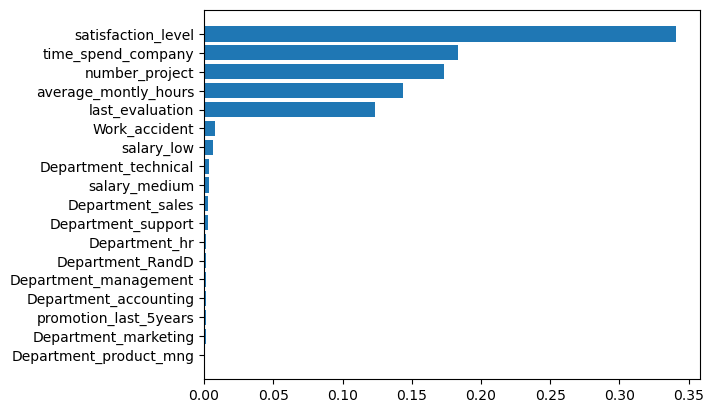

In [11]:
plt.barh(df_imp.variable,df_imp.importance);

### decision tree

In [12]:
dtc = DecisionTreeClassifier(random_state=23)
params = {'max_depth':[None,3,5],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring = 'neg_log_loss')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [13]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
best score : -0.11424197097491764


In [14]:
bm_dtc = gcv.best_estimator_
df_imp = pd.DataFrame({'variable':bm_dtc.feature_names_in_,"importance":bm_dtc.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

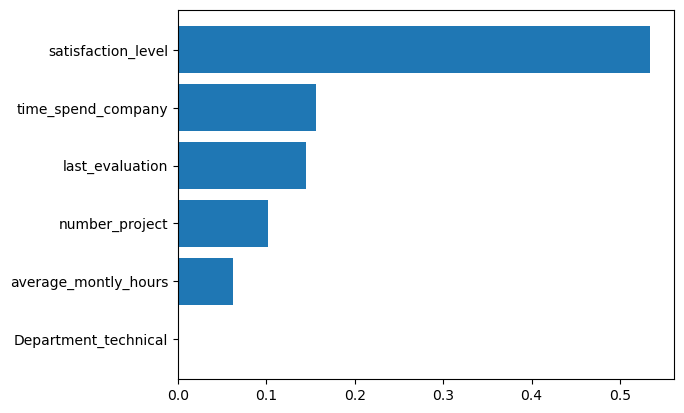

In [15]:
plt.barh(df_imp.variable,df_imp.importance);